### For a given time window say 7 days be able to predict the ‘composite demand’ or total number of ‘piezas’

In [24]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import array as arr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prophet import Prophet

data_dir = Path('data')
o_values=list()
prediction= list()
m_all=list()
for parquet_file in data_dir.glob('*.parquet*'):
    full_df=pd.read_parquet(parquet_file)
    bf=full_df[["BILL_DATE","PIEZAS"]]
    df=bf.groupby('BILL_DATE').PIEZAS.sum().to_frame(name = 'PIEZAS').reset_index()
    df.columns=['ds', 'y']
    o_values.append(df)
    m=Prophet(interval_width=0.95,daily_seasonality=True)
    model=m.fit(df)
    future=m.make_future_dataframe(periods=10,freq='D')
    forecast=m.predict(future)
    prediction.append(forecast)
    
    #x=ff['BILL_DATE'].to_numpy()
    #x_full.append(x)
    #y=ff['PIEZAS'].to_numpy()
    #y_full.append(y)

Initial log joint probability = -6.20187
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       209.563   3.11409e-05       95.5991       0.943       0.943      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       209.695   6.58042e-06       86.4481           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       209.696   5.49635e-06       102.154   5.705e-08       0.001      295  LS failed, Hessian reset 
     224       209.696   9.45173e-09       102.644      0.3072      0.3072      320   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -6.92099
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1216.02   0.000443544       93.6126      0.3721      0.372

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -3.80241
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      43       593.169   0.000203463       76.5296   2.875e-06       0.001       96  LS failed, Hessian reset 
      72       593.183   6.20205e-06       78.1034    7.51e-08       0.001      169  LS failed, Hessian reset 
      94       593.183   1.35472e-09       74.1416     0.01229           1      204   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -4.70532
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       386.964   1.77442e-05       112.699           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       386.965   6.33144e-07       73.1913     8.6e-09       0.001      191  LS failed, Hessian reset 
     141       386.965   7.433

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -4.63228
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      45       331.883   0.000472148       78.6653   5.485e-06       0.001       90  LS failed, Hessian reset 
      99       331.915   1.28782e-06       69.9887           1           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       332.045   7.57971e-06       67.6444           1           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       332.123   0.000201989       66.6901   2.394e-06       0.001      452  LS failed, Hessian reset 
     299       332.131   4.68296e-05       76.3759           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       332.135   8.62919e-09       69.9162       0.386       0.386      546   
Optimization terminat

In [25]:
o_values[0]

,ds,y
0,2019-03-04,14
1,2019-03-05,66
2,2019-03-11,37
3,2019-03-12,4
4,2019-03-14,28
...,...,...
155,2021-03-04,4
156,2021-03-08,33
157,2021-03-09,120
158,2021-03-15,47


In [27]:
prediction[0].tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
160,2021-03-24,4.778533,-39.085801,134.571947,4.778533,4.778533,38.070832,38.070832,38.070832,41.661004,...,-1.459872,-1.459872,-1.459872,-2.130301,-2.130301,-2.130301,0.0,0.0,0.0,42.849365
161,2021-03-25,4.752412,-27.152464,143.098033,4.752412,4.752412,54.482341,54.482341,54.482341,41.661004,...,12.156713,12.156713,12.156713,0.664623,0.664623,0.664623,0.0,0.0,0.0,59.234752
162,2021-03-26,4.726290,-34.474829,137.073427,4.726290,4.726290,43.187450,43.187450,43.187450,41.661004,...,-2.011724,-2.011724,-2.011724,3.538170,3.538170,3.538170,0.0,0.0,0.0,47.913740
163,2021-03-27,4.700168,-31.550436,129.520600,4.700168,4.700169,42.890401,42.890401,42.890401,41.661004,...,-5.207626,-5.207626,-5.207626,6.437023,6.437023,6.437023,0.0,0.0,0.0,47.590570
164,2021-03-28,4.674047,-28.461006,131.357263,4.674046,4.674048,47.899643,47.899643,47.899643,41.661004,...,-3.067796,-3.067796,-3.067796,9.306435,9.306435,9.306435,0.0,0.0,0.0,52.573690
165,2021-03-29,4.647925,-26.240899,150.138067,4.647923,4.647927,51.085437,51.085437,51.085437,41.661004,...,-2.667137,-2.667137,-2.667137,12.091570,12.091570,12.091570,0.0,0.0,0.0,55.733363
166,2021-03-30,4.621803,-18.209814,151.408490,4.621801,4.621806,58.657291,58.657291,58.657291,41.661004,...,2.257441,2.257441,2.257441,14.738845,14.738845,14.738845,0.0,0.0,0.0,63.279094
167,2021-03-31,4.595682,-26.122811,148.472794,4.595679,4.595685,57.398368,57.398368,57.398368,41.661004,...,-1.459872,-1.459872,-1.459872,17.197236,17.197236,17.197236,0.0,0.0,0.0,61.994050
168,2021-04-01,4.569560,-4.870297,163.762517,4.569557,4.569564,73.237227,73.237227,73.237227,41.661004,...,12.156713,12.156713,12.156713,19.419510,19.419510,19.419510,0.0,0.0,0.0,77.806787
169,2021-04-02,4.543439,-23.318530,153.131282,4.543435,4.543443,61.012634,61.012634,61.012634,41.661004,...,-2.011724,-2.011724,-2.011724,21.363354,21.363354,21.363354,0.0,0.0,0.0,65.556073


In [30]:
temp=prediction[0].tail(10)
temp=temp[['ds','yhat']]
temp

,ds,yhat
160,2021-03-24,42.849365
161,2021-03-25,59.234752
162,2021-03-26,47.913740
163,2021-03-27,47.590570
164,2021-03-28,52.573690
165,2021-03-29,55.733363
166,2021-03-30,63.279094
167,2021-03-31,61.994050
168,2021-04-01,77.806787
169,2021-04-02,65.556073


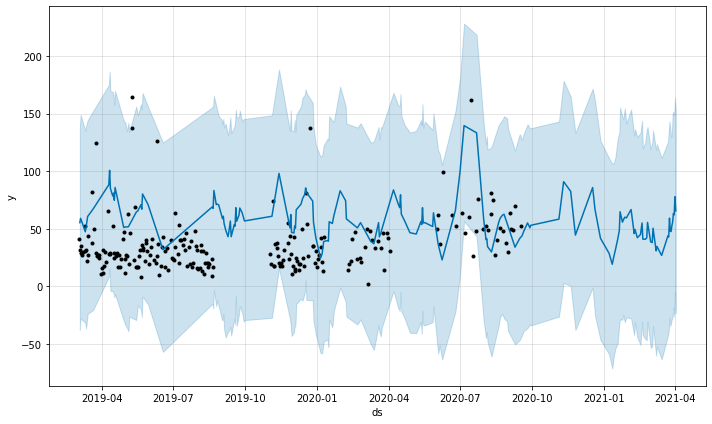

In [31]:
plot1=m.plot(prediction[0])

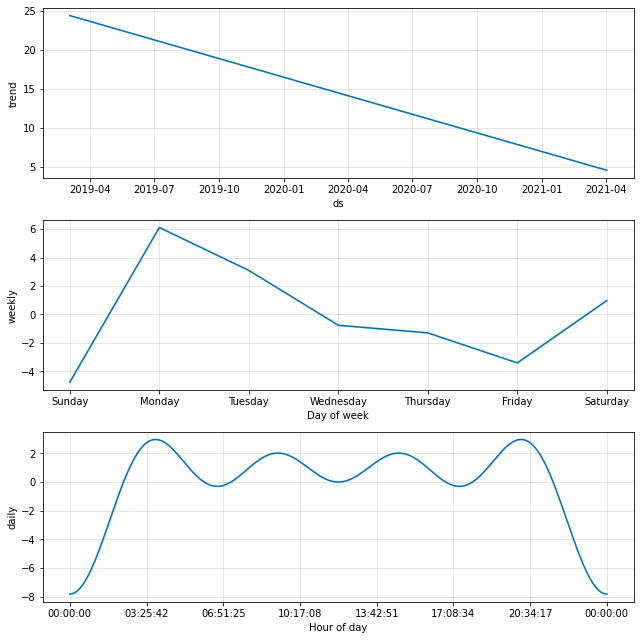

In [33]:
plot2=m.plot_components(prediction[0])